In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
def estimate_coef_OLS(x, y): 
    xmean = np.mean(x)
    ymean = np.mean(y)
    xycov = np.sum(x*y) - np.size(x)*xmean*ymean
    xvar = np.sum(x*x) - np.size(x)*xmean*xmean
    B1 = xycov / xvar
    B0 = ymean - (B1 * xmean)     
    return(B0, B1)

In [3]:
x = np.array([100, 200, 300]);
y = np.array([55, 100, 145]);
estimate_coef_OLS(x, y)

(10.0, 0.45)

In [4]:
n_samples = 100
n_outliers = 5
x, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=2)
# Add outlier data
np.random.seed(1)
x[:n_outliers] = 15 + 0.7 * np.random.normal(size=(n_outliers, 1))

In [5]:
coefs = estimate_coef_OLS(x,y)
coefs

(12.446643215933356, -29.92066849664784)

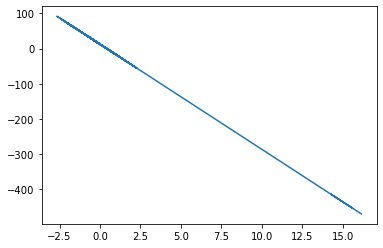

In [6]:
y2 = coefs[0] + coefs[1]*x
plt.plot(x,y2)

In [7]:
def outliers_z_score(data_array):
    threshold = 3
    mean_data_array = np.mean(data_array)
    stdev_data_array = np.std(data_array)
    z_scores = [(x - mean_data_array ) / stdev_data_array for x in data_array]
    return np.where(np.abs(z_scores) > threshold)

In [8]:
outliers = outliers_z_score(x)

In [9]:
x_withoutoutliers = np.delete(x, outliers)
y_withoutoutliers = np.delete(y, outliers)

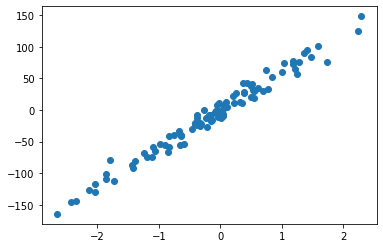

In [10]:
plt.scatter(x_withoutoutliers,y_withoutoutliers)

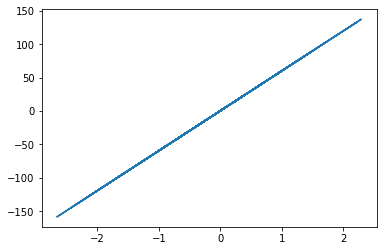

In [11]:
coefs = estimate_coef_OLS(x_withoutoutliers, y_withoutoutliers)
y2 = coefs[0] + coefs[1]*x_withoutoutliers
plt.plot(x_withoutoutliers,y2)

[ 0.28012253 59.71032114]


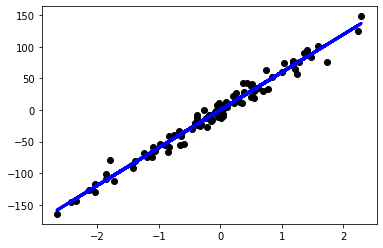

In [12]:
xc = sm.add_constant(x_withoutoutliers)

regr = linear_model.LinearRegression(fit_intercept=False)
regr.fit(xc, y_withoutoutliers)
y_pred = regr.predict(xc)

plt.scatter(x_withoutoutliers, y_withoutoutliers,  color='black')
plt.plot(x_withoutoutliers, y_pred, color='blue', linewidth=3)

print(regr.coef_)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     3978.
Date:                Sun, 06 Jun 2021   Prob (F-statistic):           4.03e-78
Time:                        09:10:07   Log-Likelihood:                -347.48
No. Observations:                  95   AIC:                             699.0
Df Residuals:                      93   BIC:                             704.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2801      0.983      0.285      0.776      -1.671       2.231
x1            59.7103      0.947     63.071      0.000      57.830      61.590
==============================================================================
Omnibus:                        0.888   Durbin-Watson:                   2.113
Prob(Omnibus):                  0.642   Jarque-Bera (JB):                0.409
Skew:                           0.008   Prob(JB):                        0.815
Kurtosis:                       3.321   Cond. No.                         1.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

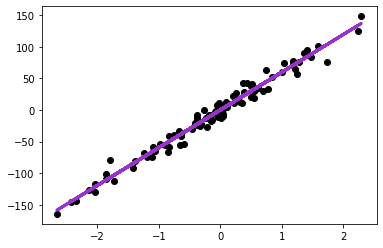

In [13]:
model = sm.OLS(y_withoutoutliers, xc)
fitted = model.fit()
y_pred = fitted.predict(xc)

plt.scatter(x_withoutoutliers, y_withoutoutliers,  color='black')
plt.plot(x_withoutoutliers, y_pred, '-', color='darkorchid', linewidth=3)

fitted.summary()

In [14]:
print(fitted.rsquared)

0.9771550350512413
